<a href="https://colab.research.google.com/github/imnbid/MachinLearning2025/blob/main/mini-project-1/Q5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown 1HG_gFSXwh5KJ6_JVyLgHglQgYtKsoFKF

Downloading...
From: https://drive.google.com/uc?id=1HG_gFSXwh5KJ6_JVyLgHglQgYtKsoFKF
To: /content/Housing.csv
100% 30.0k/30.0k [00:00<00:00, 3.00MB/s]


Q5_2

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("Housing.csv")

# Number of samples and features
num_samples, num_features = df.shape
print("Number of samples:", num_samples)
print("Number of features:", num_features)

# Data types of each feature
print("\nData types of each feature:")
print(df.dtypes)

# Number of unique values in each feature
print("\nNumber of unique values in each feature:")
print(df.nunique())

Number of samples: 545
Number of features: 13

Data types of each feature:
price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

Number of unique values in each feature:
price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64


Q5_3

First 5 rows of the dataset:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Number of samples: 545
Number of features: 13

Data Types of Each Feature:
price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

Unique Values Count per Column:
price: 219 unique values
area: 284 unique values
bedrooms: 6 unique values
bathrooms: 4 unique values
stories: 4 unique values
mainroad: 2 unique values
guestroom: 2 unique values
basement: 2 unique values
hotwaterheating: 2 unique values
airconditioning: 2 unique values
parking: 4 unique values
prefarea: 2 unique values
furnishingstatus: 3 unique values

Numerical Features: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
Categorical Features: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airc

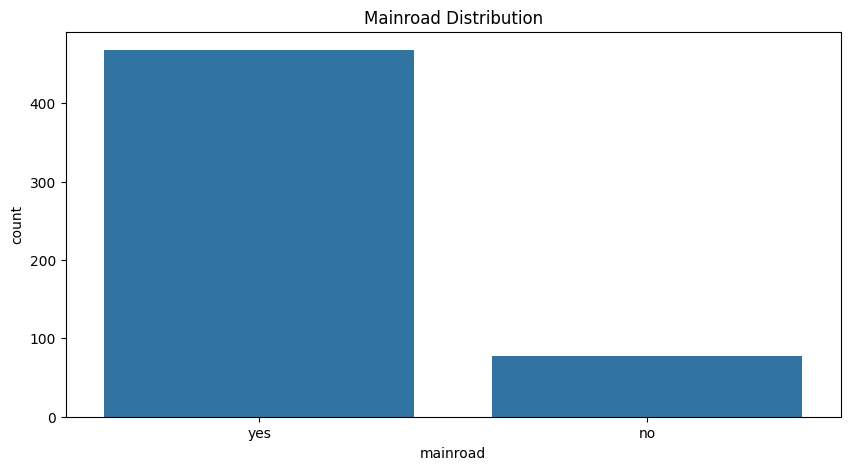

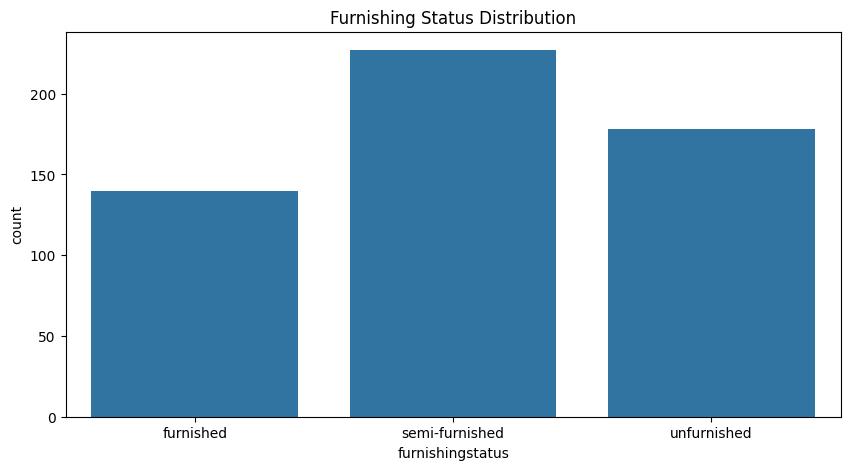

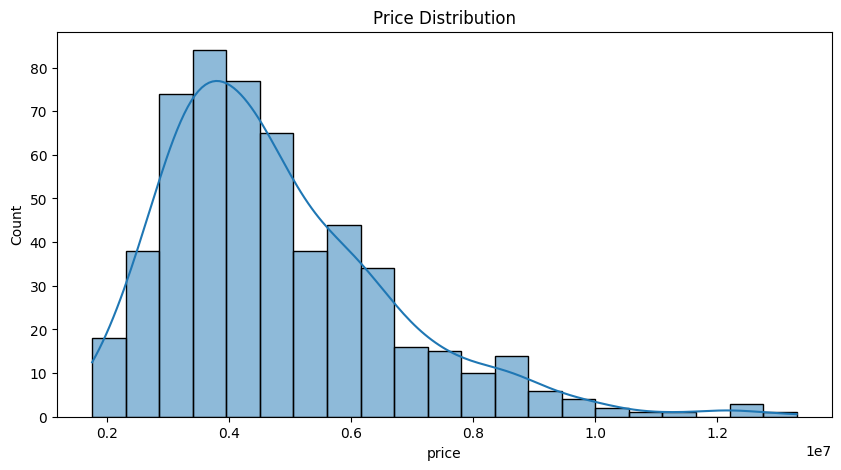

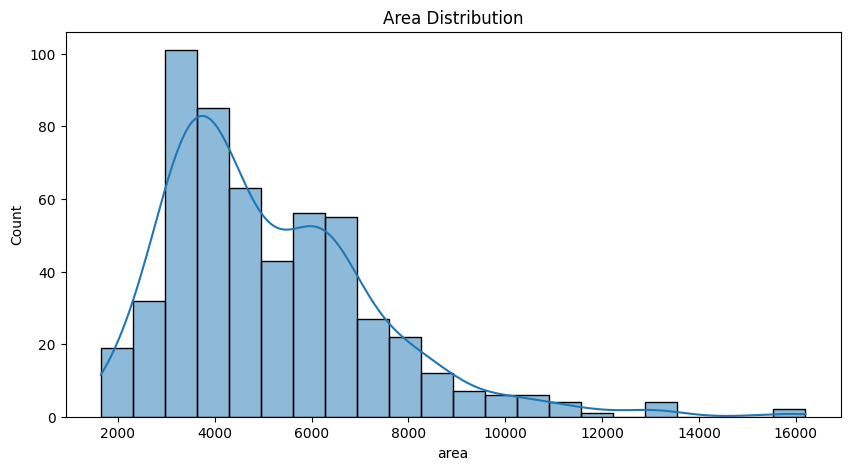

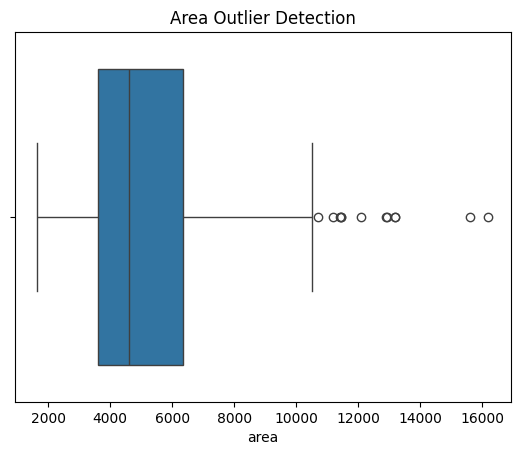

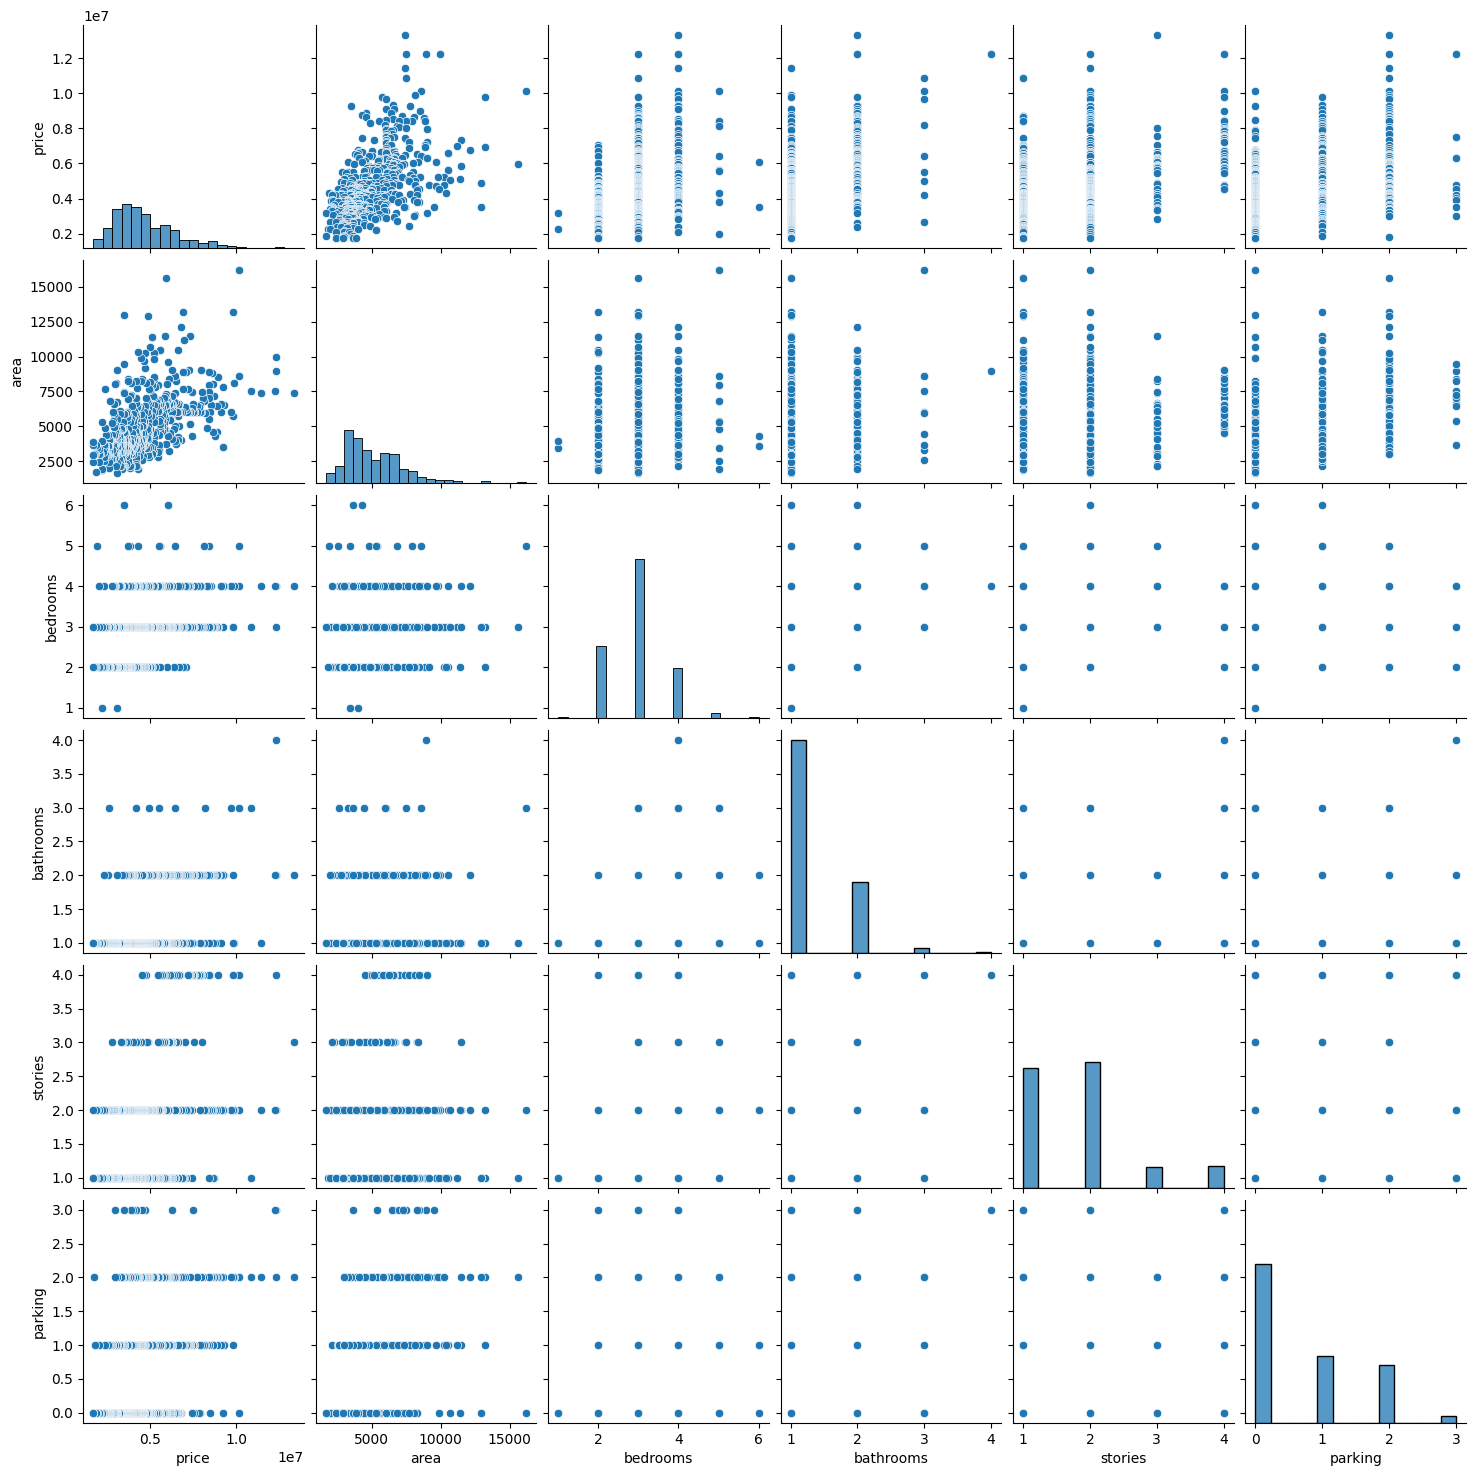

In [ ]:
# Install gdown if needed
!pip install gdown

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Download dataset from Google Drive (Example URL - replace with your file link)
# !gdown 'https://drive.google.com/uc?id=YOUR_FILE_ID'
# df = pd.read_csv('Housing.csv')

# For now, let's assume the file is already uploaded in Colab environment
df = pd.read_csv('/content/Housing.csv')

# Show first 5 rows
print("First 5 rows of the dataset:")
display(df.head())

# Dataset shape
print(f"Number of samples: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

# Data types
print("\nData Types of Each Feature:")
print(df.dtypes)

# Unique values count for each column
print("\nUnique Values Count per Column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

# Separate numerical and categorical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

print("\nNumerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

# Countplot for some categorical features
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='mainroad')
plt.title("Mainroad Distribution")
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='furnishingstatus')
plt.title("Furnishing Status Distribution")
plt.show()

# Distribution plot for some numerical features
plt.figure(figsize=(10,5))
sns.histplot(df['price'], kde=True)
plt.title("Price Distribution")
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(df['area'], kde=True)
plt.title("Area Distribution")
plt.show()

# Detect outliers visually for area
sns.boxplot(x=df['area'])
plt.title("Area Outlier Detection")
plt.show()

# Pairplot to see relationships
sns.pairplot(df[numerical_features])
plt.show()

Q5_4_1(بررسی و حذف داده‌های تکراری)

In [ ]:
duplicates = df.duplicated().sum()
print("Number of duplicated rows:", duplicates)

df = df.drop_duplicates()

Number of duplicated rows: 0


Q5_4_2(بررسی داده‌های گمشده و رفع آن)

In [ ]:
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


Q5_4_3(کدگذاری ویژگی‌های دسته‌ای) One-Hot Encoding

In [ ]:
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

Q5_4_4(حذف داده‌های پرت
) IQR

In [ ]:
for col in ['price', 'area']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

Q5_4_5(تقسیم داده به آموزش و آزمون)

In [ ]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (436, 13)
Test size: (109, 13)


Q5_4_6(نرمال‌سازی داده‌ها)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Q5_5

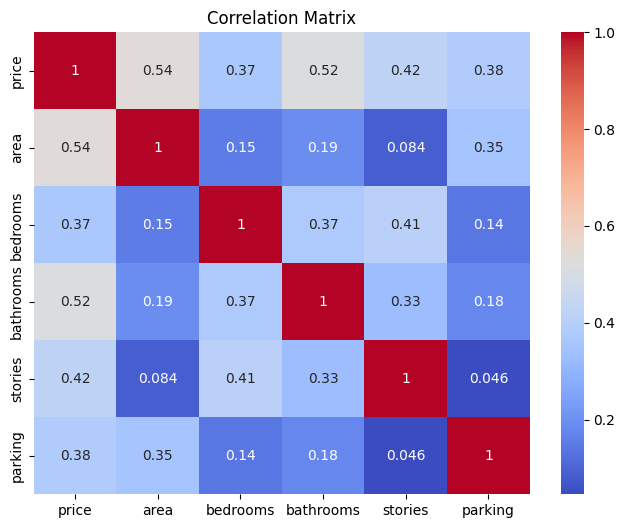

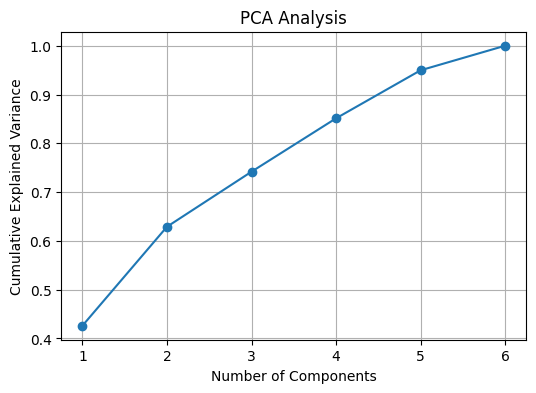

VIF Values:
      Feature        VIF
0      price  17.110853
1       area   8.895295
2   bedrooms  13.766850
3  bathrooms  10.718360
4    stories   7.463489
5    parking   2.017673
Selected Features by RFE: ['bathrooms', 'stories', 'parking']


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Load dataset
df = pd.read_csv('/content/Housing.csv')

# Select numerical features
num_features = ['price','area','bedrooms','bathrooms','stories','parking']
df_num = df[num_features]

# Correlation matrix
corr_matrix = df_num.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# PCA
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_num)

pca = PCA()
pca.fit(df_scaled)
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(6,4))
plt.plot(range(1, len(explained_variance)+1), explained_variance.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Analysis')
plt.grid(True)
plt.show()

# VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = df_num.columns
vif_data["VIF"] = [variance_inflation_factor(df_num.values, i) for i in range(df_num.shape[1])]
print("VIF Values:\n", vif_data)

# RFE
X = df_num.drop(columns=['price'])
y = df_num['price']
model = LinearRegression()
selector = RFE(model, n_features_to_select=3)
selector = selector.fit(X, y)

selected_features = X.columns[selector.support_]
print("Selected Features by RFE:", selected_features.tolist())

Q5_6

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor

# Load dataset
df = pd.read_csv("/content/Housing.csv")

# Encode categorical features using One-Hot Encoding
categorical_features = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Split features and target
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------- 1. Multiple Linear Regression ----------
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("Linear Regression R2:", r2_score(y_test, y_pred_lr))

# ---------- 2. Ridge Regression ----------
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

print("\nRidge RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("Ridge R2:", r2_score(y_test, y_pred_ridge))

# ---------- 3. Lasso Regression ----------
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

print("\nLasso RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("Lasso R2:", r2_score(y_test, y_pred_lasso))

# ---------- 4. Polynomial Regression ----------
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

poly_lr = LinearRegression()
poly_lr.fit(X_train_poly, y_train)
y_pred_poly = poly_lr.predict(X_test_poly)

print("\nPolynomial Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_poly)))
print("Polynomial Regression R2:", r2_score(y_test, y_pred_poly))

# ---------- 5. Multi-Layer Perceptron ----------
mlp = MLPRegressor(hidden_layer_sizes=(64,32), activation='relu', solver='adam', max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)
y_pred_mlp = mlp.predict(X_test_scaled)

print("\nMLP RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_mlp)))
print("MLP R2:", r2_score(y_test, y_pred_mlp))

# ---------- 6. Elastic-Net Regression ----------
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic.fit(X_train_scaled, y_train)
y_pred_elastic = elastic.predict(X_test_scaled)

print("\nElasticNet RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_elastic)))
print("ElasticNet R2:", r2_score(y_test, y_pred_elastic))

Linear Regression RMSE: 1324506.96009144
Linear Regression R2: 0.6529242642153177

Ridge RMSE: 1324703.4866138187
Ridge R2: 0.6528212603810125

Lasso RMSE: 1324506.9650482705
Lasso R2: 0.6529242616175275

Polynomial Regression RMSE: 1379016.466162188
Polynomial Regression R2: 0.6237689217365155

MLP RMSE: 4908732.619317851
MLP R2: -3.767102790847277

ElasticNet RMSE: 1329765.0693066132
ElasticNet R2: 0.650163109154231


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Q5_7

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical

# Load dataset
df = pd.read_csv('/content/Housing.csv')

# Encode categorical variables
X = df.drop('price', axis=1)
y = df['price']

cat_features = X.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(drop='first')
X_cat = encoder.fit_transform(X[cat_features]).toarray()
X_num = X.select_dtypes(exclude=['object']).values

X_final = np.hstack((X_num, X_cat))

# Create 4-class classification target
y_classes = pd.qcut(y, q=4, labels=False)
y_class_cat = to_categorical(y_classes, num_classes=4)

# Train-test split
X_train, X_test, y_train_class, y_test_class = train_test_split(X_final, y_class_cat, test_size=0.2, random_state=42)
y_train_reg, y_test_reg = train_test_split(y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build MLP classifier (Functional API)
inp = Input(shape=(X_train_scaled.shape[1],))
x = Dense(64, activation='relu')(inp)
feature_layer = Dense(32, activation='relu', name='feature_layer')(x)
out = Dense(4, activation='softmax')(feature_layer)

mlp_model = Model(inputs=inp, outputs=out)
mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
mlp_model.fit(X_train_scaled, y_train_class, epochs=50, batch_size=16, verbose=0)

# Extract features
feature_extractor = Model(inputs=mlp_model.input, outputs=mlp_model.get_layer('feature_layer').output)
X_train_features = feature_extractor.predict(X_train_scaled)
X_test_features = feature_extractor.predict(X_test_scaled)

# Evaluate models
models = {
    'Linear': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.01),
    'ElasticNet': ElasticNet(alpha=0.01, l1_ratio=0.5)
}

results = []
for name, model in models.items():
    # Original
    model.fit(X_train_scaled, y_train_reg)
    y_pred_orig = model.predict(X_test_scaled)
    r2_orig = r2_score(y_test_reg, y_pred_orig)
    rmse_orig = np.sqrt(mean_squared_error(y_test_reg, y_pred_orig))

    # MLP features
    model.fit(X_train_features, y_train_reg)
    y_pred_mlp = model.predict(X_test_features)
    r2_mlp = r2_score(y_test_reg, y_pred_mlp)
    rmse_mlp = np.sqrt(mean_squared_error(y_test_reg, y_pred_mlp))

    results.append([name, r2_orig, rmse_orig, r2_mlp, rmse_mlp])

# Table
comp_df = pd.DataFrame(results, columns=['Model', 'R2 Original', 'RMSE Original', 'R2 MLP Features', 'RMSE MLP Features'])
print(comp_df)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
        Model  R2 Original  RMSE Original  R2 MLP Features  RMSE MLP Features
0      Linear     0.652924   1.324507e+06         0.619218       1.387332e+06
1       Ridge     0.652821   1.324703e+06         0.620577       1.384855e+06
2       Lasso     0.652924   1.324507e+06         0.619218       1.387332e+06
3  ElasticNet     0.652696   1.324942e+06         0.621770       1.382675e+06


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.502e+14, tolerance: 1.344e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.401e+14, tolerance: 1.344e+11
  model = cd_fast.enet_coordinate_descent(


upgraded Q5_7

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical

# -----------------------------
# Load dataset
# -----------------------------
df = pd.read_csv('/content/Housing.csv')

# Features & target
X = df.drop('price', axis=1)
y = df['price'].values

# Encode categorical variables
cat_features = X.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(drop='first')
X_encoded = encoder.fit_transform(X[cat_features]).toarray()

# Numerical features
X_num = X.select_dtypes(exclude=['object']).values

# Combine numerical & encoded features
X_final = np.hstack((X_num, X_encoded))

# Create 4-class labels for MLP classifier
y_classes = pd.qcut(y, q=4, labels=False)
y_class_cat = to_categorical(y_classes, num_classes=4)

# Split data
X_train, X_test, y_train_class, y_test_class, y_train_price, y_test_price = train_test_split(
    X_final, y_class_cat, y, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# Build MLP classifier (Functional API)
# -----------------------------
inp = Input(shape=(X_train_scaled.shape[1],))
x = Dense(64, activation='relu')(inp)
feature_layer = Dense(32, activation='relu', name='feature_layer')(x)
out = Dense(4, activation='softmax')(feature_layer)

mlp_model = Model(inputs=inp, outputs=out)
mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train MLP
mlp_model.fit(X_train_scaled, y_train_class, epochs=50, batch_size=16, verbose=0)

# -----------------------------
# Extract features from last hidden layer
# -----------------------------
feature_extractor = Model(inputs=mlp_model.input, outputs=mlp_model.get_layer('feature_layer').output)
X_train_features = feature_extractor.predict(X_train_scaled)
X_test_features = feature_extractor.predict(X_test_scaled)

# -----------------------------
# Evaluate regression models
# -----------------------------
models = {
    'Linear': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.01),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5)
}

results = []
for name, model in models.items():
    # Baseline (original features)
    model.fit(X_train_scaled, y_train_price)
    y_pred_orig = model.predict(X_test_scaled)
    r2_orig = r2_score(y_test_price, y_pred_orig)
    rmse_orig = mean_squared_error(y_test_price, y_pred_orig) ** 0.5  # RMSE manually

    # MLP extracted features
    model.fit(X_train_features, y_train_price)
    y_pred_feat = model.predict(X_test_features)
    r2_feat = r2_score(y_test_price, y_pred_feat)
    rmse_feat = mean_squared_error(y_test_price, y_pred_feat) ** 0.5  # RMSE manually

    results.append([name, r2_orig, rmse_orig, r2_feat, rmse_feat])

# Create comparison table
comparison_df = pd.DataFrame(results, columns=[
    'Model', 'R2 Original', 'RMSE Original', 'R2 MLP Features', 'RMSE MLP Features'
])
print("\n=== Comparison Table ===")
print(comparison_df)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

=== Comparison Table ===
        Model  R2 Original  RMSE Original  R2 MLP Features  RMSE MLP Features
0      Linear     0.652924   1.324507e+06         0.608653       1.406447e+06
1       Ridge     0.652821   1.324703e+06         0.608994       1.405833e+06
2       Lasso     0.652924   1.324507e+06         0.608653       1.406447e+06
3  ElasticNet     0.650163   1.329765e+06         0.607351       1.408785e+06


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.036e+13, tolerance: 1.344e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.399e+13, tolerance: 1.344e+11
  model = cd_fast.enet_coordinate_descent(
